### 주성분 분석

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # 주성분 분석용 패키지
from pca import pca # 주성분 분석 결과 시각화를 위한 패키지
from sklearn.preprocessing import StandardScaler # 표준화 패키지 라이브러리

In [7]:
# 데이터 불러오기

df = pd.read_excel('http://itpaper.co.kr/data/iris.xlsx', engine='openpyxl')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
# 독립변수만 추출하기

target_df = df.filter(['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width'])
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
# 독립변수들을 표준화

std_x = StandardScaler().fit_transform(target_df.values)
#std_x

In [26]:
# 주성분의 수를 결정하기 위해 모든 컬럼에 대해 PCA 수행

# 원본 컬럼 수 만큼 수행
model = PCA(n_components=4)
model.fit(std_x)
model.fit_transform(std_x)
result = pd.DataFrame({
    '설명가능한 분산 비율(고윳값)': model.explained_variance_,
    '기여율': model.explained_variance_ratio_
}, index=['pca1', 'pca2', 'pca3', 'pca4'])

result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.938085,0.729624,0.729624
pca2,0.920165,0.228508,0.958132
pca3,0.147742,0.036689,0.994821
pca4,0.020854,0.005179,1.000000


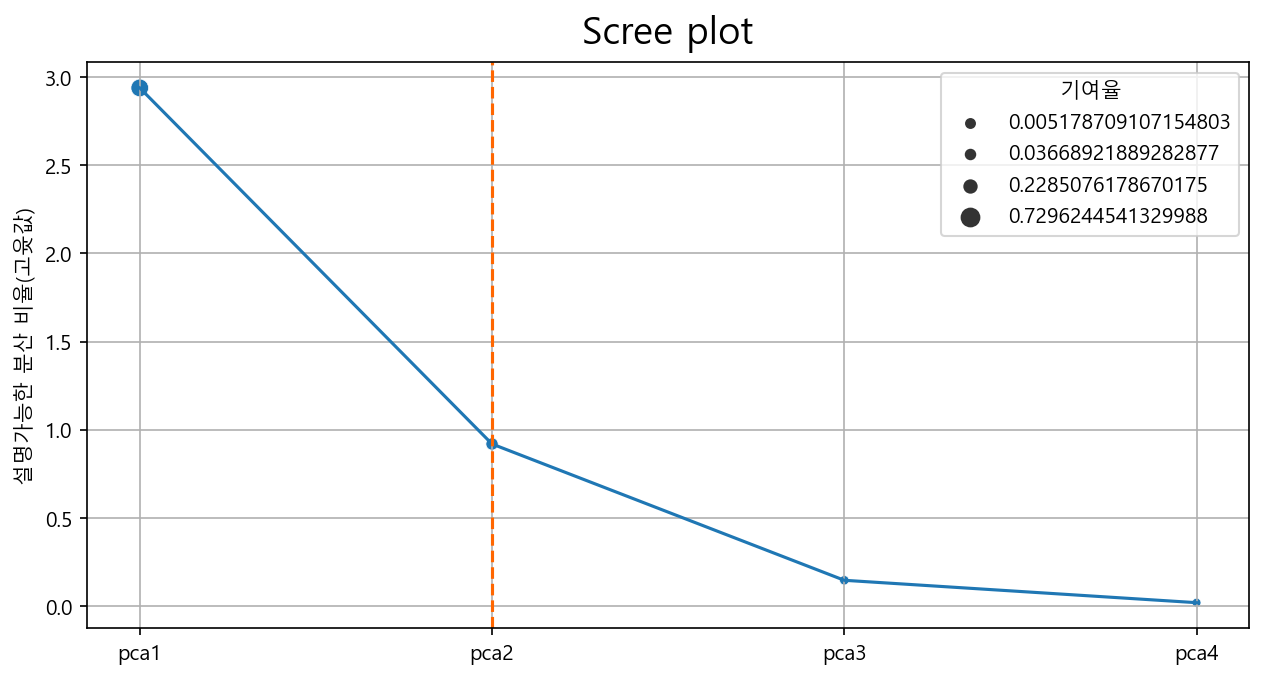

In [30]:
# Scree plot 로 확인하기

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)

sns.lineplot(data=result, x=result.index, y='설명가능한 분산 비율(고윳값)', ax=ax)
sns.scatterplot(data=result, x=result.index, y='설명가능한 분산 비율(고윳값)',size='기여율', ax=ax)

ax.grid()
ax.set_title('Scree plot', fontsize=18, pad=9)

for i, v in enumerate(result['누적기여율']):
    if v > 0.8:
        ax.axvline(result.index[i], ls='--', color='#ff6600')
        break
        


In [31]:
# 2개의주성분으로 분석 수행

model = pca(n_components=2)
fit = model.fit_transform(target_df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [32]:
fit['loadings']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
PC1,0.361387,-0.084523,0.856671,0.358289
PC2,0.656589,0.730161,-0.173373,-0.075481


In [33]:
# 각 주성분 별로 어떤 변수인지 확인하기

fit['topfeat']

,PC,feature,loading,type
0,PC1,Petal.Length,0.856671,best
1,PC2,Sepal.Width,0.730161,best
2,PC2,Sepal.Length,0.656589,weak
3,PC1,Petal.Width,0.358289,weak


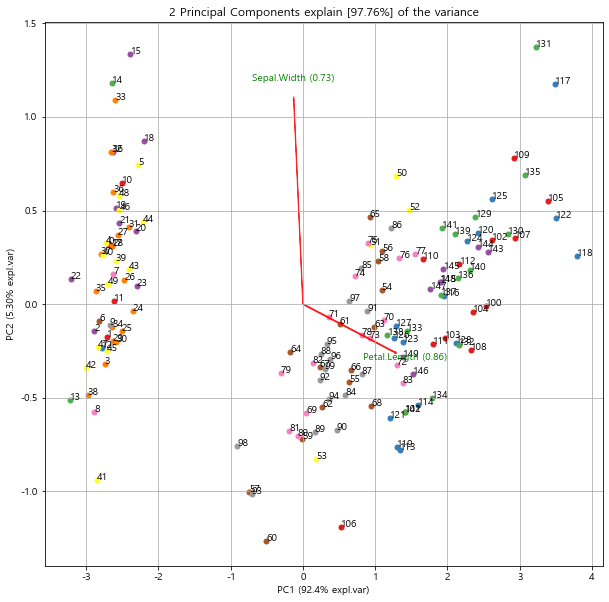

In [34]:
# biplot 시각화

fig, ax = model.biplot(n_feat=2, legend=False, figsize=(10, 10))
plt.show()
plt.close()